# Solving IVPs with Python

In [58]:
import math
import numpy
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

We wish to solve the following ODE

$$
\begin{align}
y_1' &= -2 y_1 + y_2 + 2 \sin(x) \\
y_2' &= (a - 1)y_1 - a y_2 + a (\cos(x) - \sin(x))
\end{align}
$$
over $t \in [0, 2]$ and subject to the initial condition $\mathbf Y = (y_1, y_2) = \mathbf 0$.

The above system of ODEs can be cast in the form

$$
\frac{d}{dt} \mathbf Y = \mathbf F(\mathbf Y)
$$

In [62]:
def jacobian(x, y):
    a = 150.0
    A = numpy.zeros((2,2))
    A[0,0] = -2.0
    A[0,1] = 1.0
    A[1,0] = a - 1.0
    A[1, 1] = -a
    return A

def rhs(x, y):
    a = 150.0
    rhs = numpy.zeros(2)
    rhs[0] = -2.0 * y[0] + y[1] + 2.0 * math.sin(x)
    rhs[1] = (a - 1.0) * y[0] - a * y[1] + a * (math.cos(x) - math.sin(x))
    return rhs

SciPy `solve_ivp` lets us sample our numerical solution anywhere we like. I created 200 samples in the range $[0, 2]$.

In [65]:
tsnaps = numpy.linspace(0, 2.0, 200)

In the solver, the args `y0` is the initial condition, `t_eval` is the array of time instances where we would like $\mathbf Y$ to be recorded.

The `solve_ivp()` function will use fourth order Runge Kutta by default. For this reason, we only need to provided the function to evaluate $\mathbf F$ (the RHS) which is the first arg passed to `solve_ivp()`.

In [68]:
sol = solve_ivp(rhs, [0, 2.0], y0 = numpy.zeros(2), t_eval = tsnaps)

Inspecting the returned object `sol`

In [71]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.005e-02 ...  1.990e+00  2.000e+00]
        y: [[ 0.000e+00  4.912e-03 ...  9.125e-01  9.084e-01]
            [ 0.000e+00  7.755e-01 ... -4.079e-01 -4.168e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 644
     njev: 0
      nlu: 0

We see that function evaluating the RHS was called 644 times (see `nfev`).

The solution obtained looks as follows.

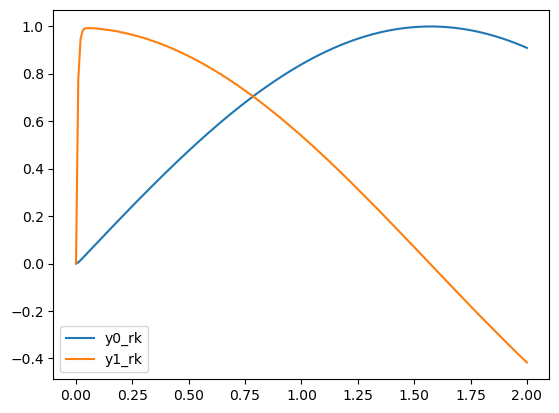

In [74]:
plt.plot(sol.t, sol.y[0][:], label='y0_rk')
plt.plot(sol.t, sol.y[1][:], label='y1_rk')
plt.legend();

This time we use a different ODE solver, one which is specialized in dealing with "stiff" systems. That is called `BDF`. BDF requires the Jacobian, which is provided with the arg `jac`.

In [77]:
sol2 = solve_ivp(rhs, [0, 2.0], method='BDF', y0 = numpy.zeros(2), t_eval = tsnaps, jac = jacobian)

In [79]:
sol2

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.005e-02 ...  1.990e+00  2.000e+00]
        y: [[ 0.000e+00  4.911e-03 ...  9.127e-01  9.086e-01]
            [ 0.000e+00  7.757e-01 ... -4.077e-01 -4.168e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 94
     njev: 1
      nlu: 14

Inspecting the object returned, we see that function evaluating the RHS was called 94 times (see `nfev`). Furthermore, the Jacobian was only evaluated once (`njev = 1`). This is good because our problem is actually linear.

The solution obtained looks as follows.

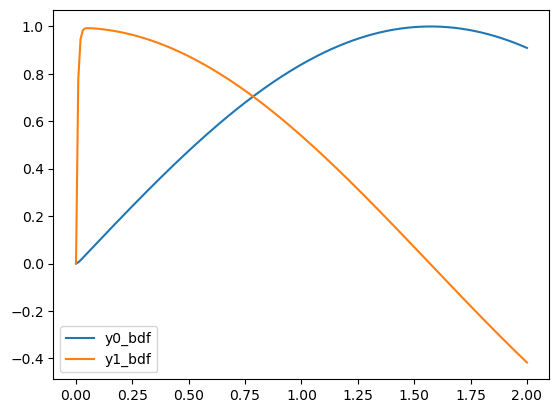

In [82]:
plt.plot(sol2.t, sol2.y[0][:], label='y0_bdf')
plt.plot(sol2.t, sol2.y[1][:], label='y1_bdf')
plt.legend();

Same solution as before, just we did less work in computing to obtain it.